In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
file='/content/drive/My Drive/housing.csv'
df=pd.read_csv(file)

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
#Study each feature and its characteristics 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [0]:
#Identify the target feature.
#the target feature is  median house value

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68bf8b49e8>,
      dtype=object)

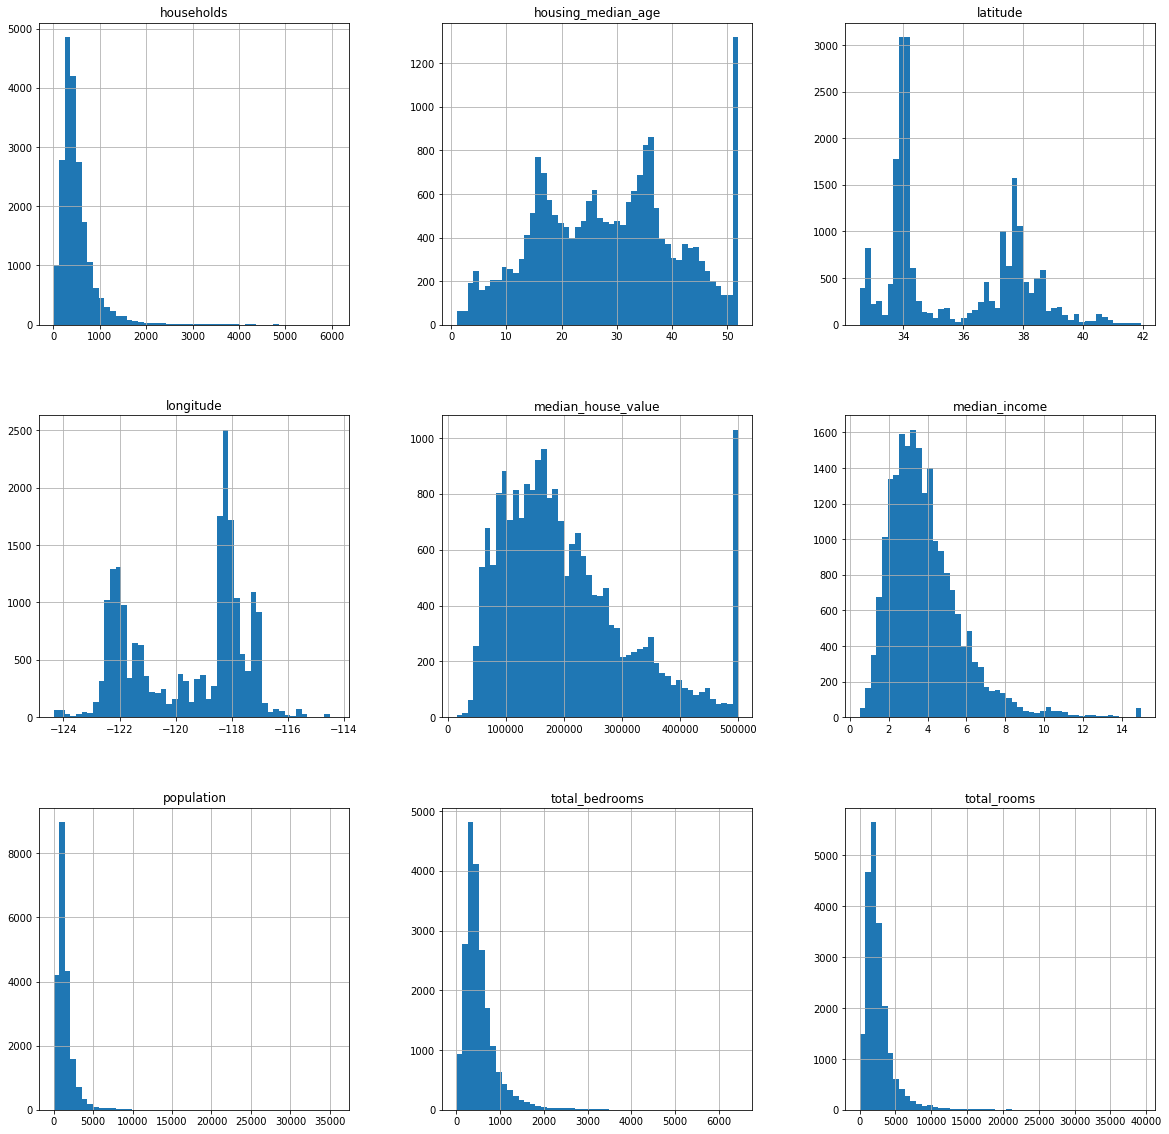

In [10]:
#Visualize the data
df.hist(bins=50, figsize=(20,20)) 


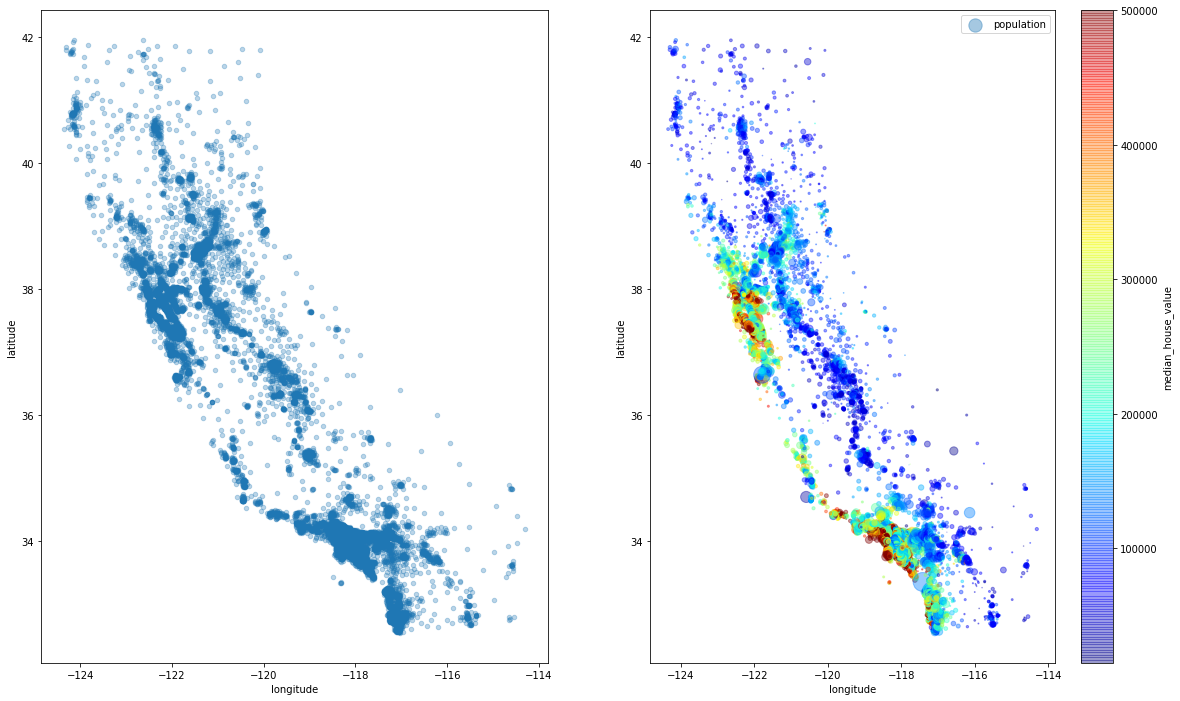

In [11]:
#the rest of visualizon the data
f, axes = plt.subplots(1, 2, figsize = (20, 12),squeeze=False)

df.plot(kind="scatter", x="longitude", y="latitude",alpha=0.3,ax=axes[0][0])
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=df["population"]/100, label="population",  c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,ax=axes[0][1] ) 




In [12]:
#Study correlation between features. 
corr_data = df.corr()
corr_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


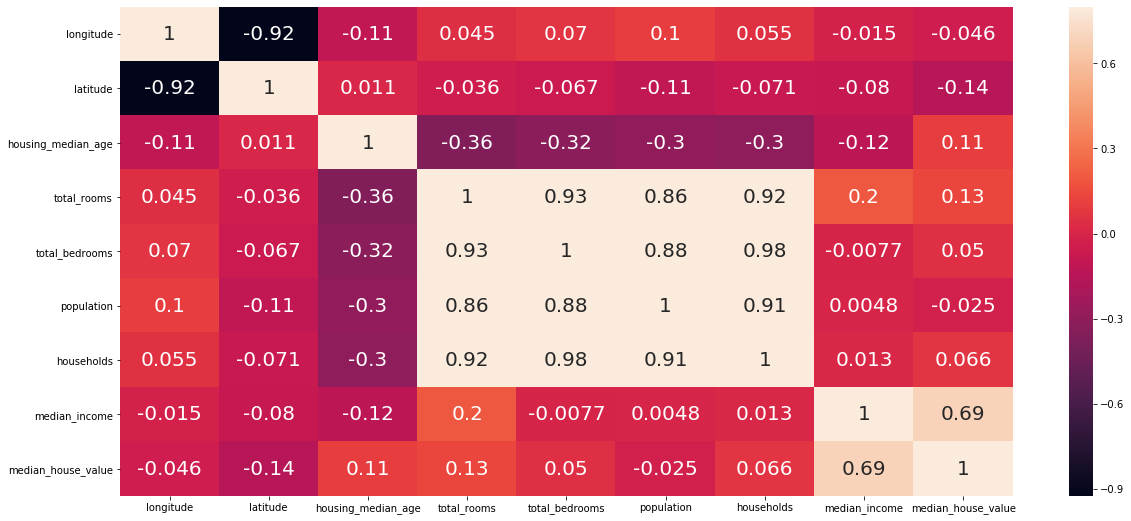

In [13]:
#drawing the heat map to visulaize the corr
import seaborn as sns
f2, ax2 = plt.subplots(figsize=(20, 9))
sns.heatmap(corr_data, vmax=.8,annot_kws={'size': 20}, annot=True)

In [14]:
#how much each attribute correlates with the median house value:
corr_data["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

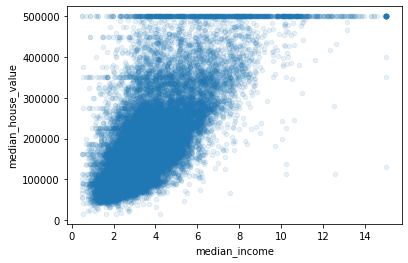

In [15]:
#it's obvious from the previously mentioned correlations, that the attribute that has the heighest weight is median_income
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)


In [0]:
#DIVIDING THE DATA INTO INDEPENDET AND TARGET VALUES
#X=df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','']]

y=df['median_house_value']
X=df.drop('median_house_value',axis=1)







In [0]:
#CLEANING THE DATA
#total bedrooms has some missing value, from my previous exercises in the data analysis course, we used to replace the missing values with the mean
#with the mean of the colum

X['total_bedrooms']=X["total_bedrooms"].fillna(X['total_bedrooms'].mean())

In [18]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [0]:
X = X.iloc[:, :].values
y = y.iloc[:].values

In [0]:
X

array([[-122.23, 37.88, 41.0, ..., 126.0, 8.3252, 'NEAR BAY'],
       [-122.22, 37.86, 21.0, ..., 1138.0, 8.3014, 'NEAR BAY'],
       [-122.24, 37.85, 52.0, ..., 177.0, 7.2574, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17.0, ..., 433.0, 1.7, 'INLAND'],
       [-121.32, 39.43, 18.0, ..., 349.0, 1.8672, 'INLAND'],
       [-121.24, 39.37, 16.0, ..., 530.0, 2.3886, 'INLAND']], dtype=object)

In [0]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [20]:
#dealing with the categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, -1] = labelencoder_X.fit_transform(X[:, -1])
onehotencoder = OneHotEncoder(categorical_features = [-1])
X = onehotencoder.fit_transform(X)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
X.shape

(20640, 13)

In [0]:
#dealing with the categorical data
#catogry_encoded, housing_categories = df["ocean_proximity"].factorize()
#from sklearn.preprocessing import OneHotEncoder 
#encoder = OneHotEncoder()  
# fit_transform() expects a 2D array, but catogry_encoded is a 1D array, so we need to reshape it
#housing_cat_hot_encoded = encoder.fit_transform(catogry_encoded.reshape(-1,1))
#housing_cat_hot_encoded.toarray() 

In [0]:
#feature scaling
from sklearn.preprocessing import StandardScaler

X= StandardScaler(with_mean=False).fit_transform(X) 

I think the features are not that too much to need pca/ feature selection so I will try to work with them all.


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() 
lin_reg.fit(X_train, y_train)
print("the training accuracy for linear reg is :",lin_reg.score(X_train,y_train),"the testing accuracy  for linear reg is ",lin_reg.score(X_test,y_test))

the training accuracy for linear reg is : 0.6455543283828666 the testing accuracy  for linear reg is  0.644168411619839


In [24]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor() 
DT.fit(X_train, y_train)
print("the training accuracy for dst is :",DT.score(X_train,y_train),"the testing accuracy for dst is",DT.score(X_test,y_test))

the training accuracy for dst is : 1.0 the testing accuracy for dst is 0.6508790549299088


According to the training accuracy (which is 1) the  desion tree model is over fitted

In [25]:
#applying the cross validation for both the models
#first, the linear reg model
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, X_train, y_train,scoring="neg_mean_squared_error")
final_lin_scores = np.sqrt(-lin_scores)
print("the scores of applying 5-k folds in cross validation for linear reg is ", final_lin_scores, "and its mean is ",final_lin_scores.mean(), "and its std is",final_lin_scores.std())

the scores of applying 5-k folds in cross validation for linear reg is  [69458.04528637 69170.54550251 68138.46604773] and its mean is  68922.35227887389 and its std is 566.5817087047008


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [26]:
tree_scores = cross_val_score(DT, X_train, y_train,scoring="neg_mean_squared_error")
final_dt_scores = np.sqrt(-tree_scores)
print("the scores of applying 5-k folds in cross validation for dst reg is ", final_dt_scores, "and its mean is ",final_dt_scores.mean(),"and its std is",final_dt_scores.std())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


the scores of applying 5-k folds in cross validation for dst reg is  [72311.81474724 72052.8611528  68166.98732148] and its mean is  70843.8877405048 and its std is 1895.8043378388859


It's obvious from the above calculations that even if the linear reg has lower accuracy it performs better than descion tree

In [29]:
#parameter tuning
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':('True', 'False'), 'normalize':('True', 'False'), 'copy_X':('True', 'False'),'n_jobs':(None,1,3)}
clf3 = GridSearchCV(lin_reg, parameters)
clf3.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': ('True', 'False'),
                         'fit_intercept': ('True', 'False'),
                         'n_jobs': (None, 1, 3),
                         'normalize': ('True', 'False')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
clf3.best_params_

{'copy_X': 'True',
 'fit_intercept': 'True',
 'n_jobs': None,
 'normalize': 'True'}

from the previous best_params_ attribute the previous parameters are the best for linear, so I am gonna tune the parameter to be this again.

In [33]:
lin_reg2 = LinearRegression(fit_intercept=True, copy_X=True, normalize=True,n_jobs=None) 
lin_reg2.fit(X_train, y_train)
print("the training accuracy for linear reg after tuning is :",lin_reg2.score(X_train,y_train),"the testing accuracy  for linear reg  after tuning is ",lin_reg2.score(X_test,y_test))

the training accuracy for linear reg after tuning is : 0.6455543283828665 the testing accuracy  for linear reg  after tuning is  0.6441684116106428


In [34]:

lin2_scores = cross_val_score(lin_reg2, X_train, y_train,scoring="neg_mean_squared_error")
final_lin_scores2 = np.sqrt(-lin2_scores)
print("the scores of applying 5-k folds in cross validation for linear reg after parameter tuning is is ", final_lin_scores2, "and its mean is ",final_lin_scores2.mean(), "and its std is",final_lin_scores2.std())

the scores of applying 5-k folds in cross validation for linear reg after parameter tuning is is  [69458.04528922 69170.54551305 68138.4660478 ] and its mean is  68922.35228335766 and its std is 566.5817111089448


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The accuracy/scores did not increase very noticabley even after tuning the parameter for linear regression because the data is not linearly


In [36]:
#applying paramter tuning to decision tree model:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(DT, param_grid, cv=5)

grid_cv_dtm.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                 

In [39]:
grid_cv_dtm.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 100,
 'min_samples_split': 10}

Applying DST with the previous parramters which give the best performance
ps: am not sure whether gridsearch has into consideration the over fitting or not(as the default desicion tree which I tried above gave over fitting), so I will try the best parameter given by the grid

In [40]:
DT2 = DecisionTreeRegressor(criterion='mae',max_depth=8,max_leaf_nodes=100,min_samples_leaf=100,min_samples_split=10) 
DT2.fit(X_train, y_train)
print("the training accuracy for dst after tuningis :",DT2.score(X_train,y_train),"the testing accuracy for dst is",DT2.score(X_test,y_test))

the training accuracy for dst after tuningis : 0.6903891429956168 the testing accuracy for dst is 0.6722941408666654


From the previous grid research best parameters, it's obvious that it takes into consideration the over fitting as the default dst gave us over fitting, so dst with the new parameters are better than linear regression(even after tuning it) and it's better than the first decion tree model (DT which I tried in the first because it has an over fitting and less testing accuracy)

In [41]:
tree_scores2 = cross_val_score(DT2, X_train, y_train,scoring="neg_mean_squared_error")
final_dt_scores2 = np.sqrt(-tree_scores2)
print("the scores of applying 5-k folds in cross validation for dst reg is ", final_dt_scores2, "and its mean is ",final_dt_scores2.mean(),"and its std is",final_dt_scores2.std())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


the scores of applying 5-k folds in cross validation for dst reg is  [67990.20415113 68375.64548189 66002.14943711] and its mean is  67455.9996900424 and its std is 1040.0005363210516


In [0]:
#from sklearn.preprocessing import OneHotEncoder 
#onehotencoder = OneHotEncoder(categorical_features = [-1]) 
#X1 = onehotencoder.fit_transform(X.head()).toarray() 
#X1
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_X = LabelEncoder()
#X[:,-1]= labelencoder_X.fit_transform(X[:,-1])
#oneHotEncoder = OneHotEncoder(categorical_features =[-1])
#X=oneHotEncoder.fit_transform(X).toarray()
#X_final = np.hstack((housing_cat_hot_encoded, X))
#X_final = pd.DataFrame({'ocean_proximity': ['NEAR BAY', '<1H OCEAN', 'NEAR OCEAN','INLAND','ISLAND']})
#pd.get_dummies(X)

In [0]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_X = LabelEncoder()
#X[:,-1]= labelencoder_X.fit_transform(X[:,-1])
#oneHotEncoder = OneHotEncoder(categorical_features =[-1])
#X=oneHotEncoder.fit_transform(X).toarray()


In [0]:
#X[0,:]
#X=pd.DataFrame(X)
#X.head()

,0,1,2,3,4,5,6,7,8,9,...,18631,18632,18633,18634,18635,18636,18637,18638,18639,18640
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-122.23,37.88,41.0,880.0,129.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-122.22,37.86,21.0,7099.0,1106.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-122.24,37.85,52.0,1467.0,190.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1274.0,235.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1627.0,280.0


In [0]:
#feature scaling
#from sklearn.preprocessing import StandardScaler

#X= StandardScaler().fit_transform(X) 